Analisando K3C10J1

In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import scipy
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering 



# Functions

In [5]:
def mean_rel(dir):
    all_files = [file for file in os.listdir(dir) if file.endswith("_allConfigurations.csv")]
    print(all_files)
    all_files = [os.path.join(dir, file) for file in all_files]
    dfs_conf= []

    for file in all_files:
        print(f"Lendo arquivo: {file}")
        df = pd.read_csv(file)
        df.index = df.index + 1
        #tratando
        df = df.drop(df.columns[0],axis=1)
        df = df.drop(df.columns[10],axis=1)
        #normalizando
        df = df / df.max(axis=0)
        #adiciona a lista de dataframes
        dfs_conf.append(df)
    
    print(len(dfs_conf))

    all_files = [file for file in os.listdir(dir) if file.endswith("_experiments.csv")]
    print(all_files)
    all_files = [os.path.join(dir, file) for file in all_files]
    dfs_exp= []

    for file in all_files:
        print(f"Lendo arquivo: {file}")
        df = pd.read_csv(file, sep=" ")
        df.index = df.index + 1
        #tratando
        df = df.T
        #print(df)
        #normalizando
        #df = df / df.max(axis=0)
        #print(df)
        #adiciona a lista de dataframes
        dfs_exp.append(df)
    
    print(len(dfs_exp))

    dfs_rel = []

    aux = 0
    for i in range(len(dfs_exp)):
        #armazenando número de colunas
        n_col_exp = dfs_exp[i].shape[1]
        #Prepara para concatenar
        dfs_conf[i] = dfs_conf[i].reset_index(drop=True)
        dfs_exp[i] = dfs_exp[i].reset_index(drop=True)
        #print(dfs_conf[i])
        #print(dfs_exp[i])
        #Concatena
        df_resul = pd.concat([dfs_conf[i], dfs_exp[i]], axis=1)
        #print(df_resul)
        #Calcula a correlação
        df_corr = df_resul.corr(method='kendall')
        #print(df_corr)
        #Soma a lista de dataframes de relação
        df_loc = df_corr.iloc[n_col_exp:(n_col_exp + 10), 0:10]
        #print(df_loc)
        dfs_rel.append(df_loc)
        #armazena maior numero de experimentos
        if(n_col_exp > aux):
            aux = n_col_exp

    print(f"configurantions{dfs_conf[-1]}")
    print(f"experiments{dfs_exp[-1]}")
    print(f"pós concat:{df_resul}")    
    print(f"pós corr:{df_corr}")
    print(f"pós corte:{df_loc}")
        
    if len(dfs_rel) > 0:
        df_mean = pd.concat(dfs_rel).groupby(level=0).mean()
        #print(df_mean.info)
    
    return df_mean


In [6]:
def mean_corr(dir):
    all_files = [file for file in os.listdir(dir) if file.endswith("_allConfigurations.csv")]
    print(all_files)
    all_files = [os.path.join(dir, file) for file in all_files]
    dfs= []

    for file in all_files:
        print(f"Lendo arquivo: {file}")
        df = pd.read_csv(file)
        df.index = df.index + 1
        #tratando
        df = df.drop(df.columns[0],axis=1)
        df = df.drop(df.columns[10],axis=1)
        #normalizando
        df = df / df.max(axis=0)
        #gerando correlação
        df = df.corr(method='kendall')
        dfs.append(df)
    
    print(len(dfs))
    
    if len(dfs) > 0:
        df_mean = pd.concat(dfs).groupby(level=0).mean()
        #print(df_mean.info)
    
    return df_mean


In [7]:
def group_bestConfig(dir):
    all_files = [file for file in os.listdir(dir) if file.endswith("_bestConfig.csv")]
    print(all_files)
    all_files = [os.path.join(dir, file) for file in all_files]
    dfs= []

    for file in all_files:
        print(f"Lendo arquivo: {file}")
        df = pd.read_csv(file, sep=",")
        df_long = df.melt(
            id_vars=["Unnamed: 0", ".ID.", "nbIterTraces", "nbGranular", "mu", "lambda",
                    "nbElite", "nbClose", "nbIterPenaltyManagement", "targetFeasible", "penaltyIncrease", "penaltyDecrease", ".PARENT."],
            var_name="X_variable",
            value_name="X_value"
        )
        dfs.append(df_long)

    print("aqui")
    print(len(dfs))
    
    if len(dfs) > 0:
        print("Funcionou")
    
    df_resul = pd.concat(dfs, axis=0, ignore_index=True)
        
    
    return df_resul


# Sketch

In [8]:
df_bestConfig = group_bestConfig('/home/administrador/giron/labotim/cvrp-cec/logs_extraidos')
print(df_bestConfig.info)

FileNotFoundError: [WinError 3] O sistema não pode encontrar o caminho especificado: '/home/administrador/giron/labotim/cvrp-cec/logs_extraidos'

In [40]:
df_bestConfig

,Unnamed: 0,.ID.,nbIterTraces,nbGranular,mu,lambda,nbElite,nbClose,nbIterPenaltyManagement,targetFeasible,penaltyIncrease,penaltyDecrease,.PARENT.,X_variable,X_value
0,1,7,700,15,20,40,7,4,150,0.3,1.3,0.85,2.0,X1,33608
1,1,7,700,15,20,40,7,4,150,0.3,1.3,0.85,2.0,X2,47944
2,1,7,700,15,20,40,7,4,150,0.3,1.3,0.85,2.0,X3,107029
3,1,7,700,15,20,40,7,4,150,0.3,1.3,0.85,2.0,X4,11669
4,1,7,700,15,20,40,7,4,150,0.3,1.3,0.85,2.0,X5,115936
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1691,1,11,700,25,30,20,5,6,100,0.3,1.2,0.75,5.0,X9,1340
1692,1,11,700,25,30,20,5,6,100,0.3,1.2,0.75,5.0,X10,14971
1693,1,11,700,25,30,20,5,6,100,0.3,1.2,0.75,5.0,X11,100997
1694,1,11,700,25,30,20,5,6,100,0.3,1.2,0.75,5.0,X12,8407


In [35]:
df = pd.read_csv('/home/administrador/giron/labotim/cvrp-cec/logs_extraidos/irace_K3E1C10J1_bestConfig.csv', sep=",")
df

,Unnamed: 0,.ID.,nbIterTraces,nbGranular,mu,lambda,nbElite,nbClose,nbIterPenaltyManagement,targetFeasible,...,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13
0,1,6,700,20,30,20,5,2,100,0.4,...,66459,21245,1811,55539,27042,224094,74475,147490,27546,27047


In [36]:
df_long = df.melt(
    id_vars=["Unnamed: 0", ".ID.", "nbIterTraces", "nbGranular", "mu", "lambda",
             "nbElite", "nbClose", "nbIterPenaltyManagement", "targetFeasible", "penaltyIncrease", "penaltyDecrease", ".PARENT."],
    var_name="X_variable",
    value_name="X_value"
)

In [37]:
df_long

,Unnamed: 0,.ID.,nbIterTraces,nbGranular,mu,lambda,nbElite,nbClose,nbIterPenaltyManagement,targetFeasible,penaltyIncrease,penaltyDecrease,.PARENT.,X_variable,X_value
0,1,6,700,20,30,20,5,2,100,0.4,1.2,0.65,3,X1,147397
1,1,6,700,20,30,20,5,2,100,0.4,1.2,0.65,3,X2,27546
2,1,6,700,20,30,20,5,2,100,0.4,1.2,0.65,3,X3,42157
3,1,6,700,20,30,20,5,2,100,0.4,1.2,0.65,3,X4,66459
4,1,6,700,20,30,20,5,2,100,0.4,1.2,0.65,3,X5,21245
5,1,6,700,20,30,20,5,2,100,0.4,1.2,0.65,3,X6,1811
6,1,6,700,20,30,20,5,2,100,0.4,1.2,0.65,3,X7,55539
7,1,6,700,20,30,20,5,2,100,0.4,1.2,0.65,3,X8,27042
8,1,6,700,20,30,20,5,2,100,0.4,1.2,0.65,3,X9,224094
9,1,6,700,20,30,20,5,2,100,0.4,1.2,0.65,3,X10,74475


In [248]:
df = mean_rel('/home/alobogiron/work/cvrp-cec/logs_extraidos')
df

['irace_K3E1C10J1_allConfigurations.csv', 'irace_K3E1C10J2_allConfigurations.csv', 'irace_K3E1C10J3_allConfigurations.csv', 'irace_K3E1C15J1_allConfigurations.csv', 'irace_K3E1C15J2_allConfigurations.csv', 'irace_K3E1C15J3_allConfigurations.csv', 'irace_K3E1C18J1_allConfigurations.csv', 'irace_K3E1C18J2_allConfigurations.csv', 'irace_K3E1C18J3_allConfigurations.csv', 'irace_K3E2C10J1_allConfigurations.csv', 'irace_K3E2C10J2_allConfigurations.csv', 'irace_K3E2C10J3_allConfigurations.csv', 'irace_K3E2C15J1_allConfigurations.csv', 'irace_K3E2C15J2_allConfigurations.csv', 'irace_K3E2C15J3_allConfigurations.csv', 'irace_K3E2C18J1_allConfigurations.csv', 'irace_K3E2C18J2_allConfigurations.csv', 'irace_K3E2C18J3_allConfigurations.csv', 'irace_K3E3C10J1_allConfigurations.csv', 'irace_K3E3C10J2_allConfigurations.csv', 'irace_K3E3C10J3_allConfigurations.csv', 'irace_K3E3C15J1_allConfigurations.csv', 'irace_K3E3C15J2_allConfigurations.csv', 'irace_K3E3C15J3_allConfigurations.csv', 'irace_K3E3C18J

,nbIterTraces,nbGranular,mu,lambda,nbElite,nbClose,nbIterPenaltyManagement,targetFeasible,penaltyIncrease,penaltyDecrease
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lambda,-0.037672,0.119114,-0.191062,1.000000,-0.144821,0.036687,0.285687,0.328518,0.096741,0.055603
mu,-0.080777,0.080992,1.000000,-0.191062,0.198491,0.245388,-0.257944,-0.185584,-0.041750,-0.084184
nbClose,-0.312485,0.218615,0.245388,0.036687,-0.102879,1.000000,-0.229164,0.008512,0.021177,0.000512


['irace_K3E1C10J1_allConfigurations.csv', 'irace_K3E1C10J2_allConfigurations.csv', 'irace_K3E1C10J3_allConfigurations.csv', 'irace_K3E1C15J1_allConfigurations.csv', 'irace_K3E1C15J2_allConfigurations.csv', 'irace_K3E1C15J3_allConfigurations.csv', 'irace_K3E1C18J1_allConfigurations.csv', 'irace_K3E1C18J2_allConfigurations.csv', 'irace_K3E1C18J3_allConfigurations.csv', 'irace_K3E2C10J1_allConfigurations.csv', 'irace_K3E2C10J2_allConfigurations.csv', 'irace_K3E2C10J3_allConfigurations.csv', 'irace_K3E2C15J1_allConfigurations.csv', 'irace_K3E2C15J2_allConfigurations.csv', 'irace_K3E2C15J3_allConfigurations.csv', 'irace_K3E2C18J1_allConfigurations.csv', 'irace_K3E2C18J2_allConfigurations.csv', 'irace_K3E2C18J3_allConfigurations.csv', 'irace_K3E3C10J1_allConfigurations.csv', 'irace_K3E3C10J2_allConfigurations.csv', 'irace_K3E3C10J3_allConfigurations.csv', 'irace_K3E3C15J1_allConfigurations.csv', 'irace_K3E3C15J2_allConfigurations.csv', 'irace_K3E3C15J3_allConfigurations.csv', 'irace_K3E3C18J

<Axes: >

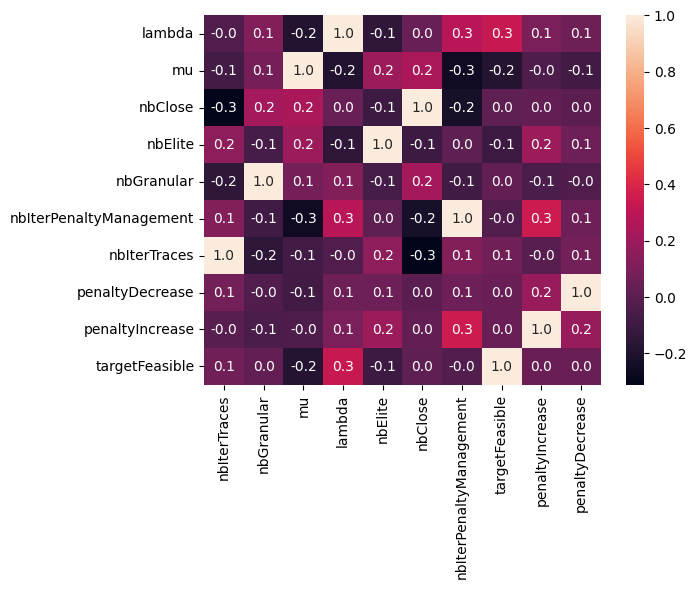

In [249]:
df_corr_geral = mean_corr('/home/alobogiron/work/cvrp-cec/logs_extraidos')
sns.heatmap(df_corr_geral, annot=True, fmt=".1f")

In [250]:
df_corr_geral

,nbIterTraces,nbGranular,mu,lambda,nbElite,nbClose,nbIterPenaltyManagement,targetFeasible,penaltyIncrease,penaltyDecrease
lambda,-0.037672,0.119114,-0.191062,1.000000,-0.144821,0.036687,0.285687,0.328518,0.096741,0.055603
mu,-0.080777,0.080992,1.000000,-0.191062,0.198491,0.245388,-0.257944,-0.185584,-0.041750,-0.084184
nbClose,-0.312485,0.218615,0.245388,0.036687,-0.102879,1.000000,-0.229164,0.008512,0.021177,0.000512
nbElite,0.155948,-0.068335,0.198491,-0.144821,1.000000,-0.102879,0.006133,-0.101326,0.195693,0.058134
nbGranular,-0.150249,1.000000,0.080992,0.119114,-0.068335,0.218615,-0.087497,0.021546,-0.051050,-0.039168
nbIterPenaltyManagement,0.122247,-0.087497,-0.257944,0.285687,0.006133,-0.229164,1.000000,-0.032409,0.344032,0.060706
nbIterTraces,1.000000,-0.150249,-0.080777,-0.037672,0.155948,-0.312485,0.122247,0.071266,-0.011190,0.076172
penaltyDecrease,0.076172,-0.039168,-0.084184,0.055603,0.058134,0.000512,0.060706,0.042367,0.189184,1.000000
penaltyIncrease,-0.011190,-0.051050,-0.041750,0.096741,0.195693,0.021177,0.344032,0.042252,1.000000,0.189184
targetFeasible,0.071266,0.021546,-0.185584,0.328518,-0.101326,0.008512,-0.032409,1.000000,0.042252,0.042367


In [251]:
def create_heatmaps(df_configurations, df_experiments):
    #Trata df_config
    df_configurations.index = df_configurations.index + 1
    df_configurations = df_configurations.drop(df_configurations.columns[0],axis=1)
    df_configurations = df_configurations.drop(df_configurations.columns[10],axis=1)
    n_col_config = df_configurations.shape[1]
    #Trata df_experi
    df_experiments.index = df_experiments.index + 1
    df_experiments = df_experiments.T
    n_col_exp = df_experiments.shape[1]
    #Prepara para o concat
    df_configurations = df_configurations.reset_index(drop=True)
    df_experiments = df_experiments.reset_index(drop=True)
    df_resul = pd.concat([df_configurations, df_experiments], axis=1)
    #Realiza a correlação
    df_corr = df_resul.corr(method='kendall')
    print(df_corr.info())
    #Criando dataframe para o heatmap de correlação
    df_corr_heatmap = df_corr.iloc[0:n_col_config, 0:n_col_config]

    #Criando dataframe para o heatmap de relação direta
    df_rel_heatmap = df_corr.iloc[0:n_col_config, n_col_config:(n_col_config + n_col_exp)]
    
    
        

    

In [252]:
df_configurations = pd.read_csv("../logs_extraidos/irace_K3E1C10J1_allConfigurations.csv")
df_configurations.index = df_configurations.index + 1
df_configurations = df_configurations.drop(df_configurations.columns[0],axis=1)
df_configurations = df_configurations.drop(df_configurations.columns[10],axis=1)
n_col_config = df_configurations.shape[1]
print(n_col_config)
df_configurations

10


,nbIterTraces,nbGranular,mu,lambda,nbElite,nbClose,nbIterPenaltyManagement,targetFeasible,penaltyIncrease,penaltyDecrease
1,500,25,25,60,5,8,100,0.4,1.4,0.75
2,700,20,30,40,7,4,50,0.2,1.2,0.65
3,700,20,20,60,5,2,150,0.3,1.3,0.65
4,500,20,25,20,7,2,150,0.2,1.3,0.65
5,700,20,20,60,3,2,100,0.3,1.2,0.85
6,700,20,30,20,5,2,100,0.4,1.2,0.65
7,700,20,25,40,5,2,150,0.3,1.2,0.85
8,700,25,30,40,5,2,150,0.4,1.2,0.65
9,250,20,30,40,5,2,100,0.4,1.2,0.65
10,700,20,30,20,5,2,100,0.4,1.2,0.65


In [253]:
df_normalized = df_configurations / df_configurations.max(axis=0)
df_normalized

,nbIterTraces,nbGranular,mu,lambda,nbElite,nbClose,nbIterPenaltyManagement,targetFeasible,penaltyIncrease,penaltyDecrease
1,0.714286,1.0,0.833333,1.000000,0.714286,1.00,0.666667,1.00,1.000000,0.882353
2,1.000000,0.8,1.000000,0.666667,1.000000,0.50,0.333333,0.50,0.857143,0.764706
3,1.000000,0.8,0.666667,1.000000,0.714286,0.25,1.000000,0.75,0.928571,0.764706
4,0.714286,0.8,0.833333,0.333333,1.000000,0.25,1.000000,0.50,0.928571,0.764706
5,1.000000,0.8,0.666667,1.000000,0.428571,0.25,0.666667,0.75,0.857143,1.000000
6,1.000000,0.8,1.000000,0.333333,0.714286,0.25,0.666667,1.00,0.857143,0.764706
7,1.000000,0.8,0.833333,0.666667,0.714286,0.25,1.000000,0.75,0.857143,1.000000
8,1.000000,1.0,1.000000,0.666667,0.714286,0.25,1.000000,1.00,0.857143,0.764706
9,0.357143,0.8,1.000000,0.666667,0.714286,0.25,0.666667,1.00,0.857143,0.764706
10,1.000000,0.8,1.000000,0.333333,0.714286,0.25,0.666667,1.00,0.857143,0.764706


In [254]:
df_corr = df_configurations.corr(method='kendall')

In [255]:
df_corr

,nbIterTraces,nbGranular,mu,lambda,nbElite,nbClose,nbIterPenaltyManagement,targetFeasible,penaltyIncrease,penaltyDecrease
nbIterTraces,1.000000,-0.156386,-0.037450,0.000000,-0.217391,-0.202289,0.038720,-0.112351,-0.434783,0.086957
nbGranular,-0.156386,1.000000,0.089803,0.304636,-0.104257,0.424437,0.139272,0.449013,0.312772,0.104257
mu,-0.037450,0.089803,1.000000,-0.562775,0.299602,0.043561,-0.366871,0.387097,-0.486854,-0.561754
lambda,0.000000,0.304636,-0.562775,1.000000,-0.435572,0.337760,0.000000,-0.062531,0.290382,0.471870
nbElite,-0.217391,-0.104257,0.299602,-0.435572,1.000000,0.303433,0.000000,-0.411953,0.217391,-0.521739
nbClose,-0.202289,0.424437,0.043561,0.337760,0.303433,1.000000,-0.495415,-0.087121,0.354005,0.151717
nbIterPenaltyManagement,0.038720,0.139272,-0.366871,0.000000,0.000000,-0.495415,1.000000,-0.133407,0.271041,0.038720
targetFeasible,-0.112351,0.449013,0.387097,-0.062531,-0.411953,-0.087121,-0.133407,1.000000,-0.149801,-0.112351
penaltyIncrease,-0.434783,0.312772,-0.486854,0.290382,0.217391,0.354005,0.271041,-0.149801,1.000000,0.043478
penaltyDecrease,0.086957,0.104257,-0.561754,0.471870,-0.521739,0.151717,0.038720,-0.112351,0.043478,1.000000


In [256]:
df_experiments = pd.read_csv("../logs_extraidos/irace_K3E1C10J1_experiments.csv", sep=" ")
df_experiments.index = df_experiments.index + 1
df_experiments = df_experiments.T
n_col_exp = df_experiments.shape[1]
df_experiments

,1,2,3,4,5,6,7,8,9,10,11,12,13
1,147981.0,27662.0,42325.0,66535.0,21245.0,1819.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,147926.0,27644.0,42147.0,66390.0,21254.0,1814.0,55539.0,NaN,NaN,NaN,NaN,NaN,NaN
3,147699.0,27606.0,42114.0,66496.0,21245.0,1813.0,55551.0,27042.0,224077.0,74683.0,147664.0,NaN,NaN
4,148110.0,27679.0,42204.0,66290.0,21245.0,1813.0,55539.0,27042.0,223694.0,NaN,NaN,NaN,NaN
5,147785.0,27610.0,42160.0,66621.0,21245.0,1815.0,55539.0,27050.0,224296.0,NaN,NaN,NaN,NaN
6,147397.0,27546.0,42157.0,66459.0,21245.0,1811.0,55539.0,27042.0,224094.0,74475.0,147490.0,27546.0,27047.0
7,NaN,NaN,42209.0,NaN,21245.0,NaN,NaN,27042.0,NaN,74639.0,NaN,27587.0,NaN
8,147909.0,27703.0,42120.0,66649.0,21245.0,1811.0,55539.0,27042.0,224189.0,74666.0,148552.0,27703.0,27042.0
9,147965.0,27536.0,42120.0,66609.0,21245.0,1815.0,55539.0,27042.0,224316.0,74850.0,148183.0,27536.0,27042.0
10,147539.0,27546.0,42168.0,66482.0,21245.0,1813.0,55539.0,27042.0,224215.0,74475.0,147762.0,27546.0,27042.0


In [257]:
df_configurations = df_configurations.reset_index(drop=True)
df_experiments = df_experiments.reset_index(drop=True)
df_resul = pd.concat([df_configurations, df_experiments], axis=1)
df_resul

,nbIterTraces,nbGranular,mu,lambda,nbElite,nbClose,nbIterPenaltyManagement,targetFeasible,penaltyIncrease,penaltyDecrease,...,4,5,6,7,8,9,10,11,12,13
0,500,25,25,60,5,8,100,0.4,1.4,0.75,...,66535.0,21245.0,1819.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,700,20,30,40,7,4,50,0.2,1.2,0.65,...,66390.0,21254.0,1814.0,55539.0,NaN,NaN,NaN,NaN,NaN,NaN
2,700,20,20,60,5,2,150,0.3,1.3,0.65,...,66496.0,21245.0,1813.0,55551.0,27042.0,224077.0,74683.0,147664.0,NaN,NaN
3,500,20,25,20,7,2,150,0.2,1.3,0.65,...,66290.0,21245.0,1813.0,55539.0,27042.0,223694.0,NaN,NaN,NaN,NaN
4,700,20,20,60,3,2,100,0.3,1.2,0.85,...,66621.0,21245.0,1815.0,55539.0,27050.0,224296.0,NaN,NaN,NaN,NaN
5,700,20,30,20,5,2,100,0.4,1.2,0.65,...,66459.0,21245.0,1811.0,55539.0,27042.0,224094.0,74475.0,147490.0,27546.0,27047.0
6,700,20,25,40,5,2,150,0.3,1.2,0.85,...,NaN,21245.0,NaN,NaN,27042.0,NaN,74639.0,NaN,27587.0,NaN
7,700,25,30,40,5,2,150,0.4,1.2,0.65,...,66649.0,21245.0,1811.0,55539.0,27042.0,224189.0,74666.0,148552.0,27703.0,27042.0
8,250,20,30,40,5,2,100,0.4,1.2,0.65,...,66609.0,21245.0,1815.0,55539.0,27042.0,224316.0,74850.0,148183.0,27536.0,27042.0
9,700,20,30,20,5,2,100,0.4,1.2,0.65,...,66482.0,21245.0,1813.0,55539.0,27042.0,224215.0,74475.0,147762.0,27546.0,27042.0


In [258]:
df_corr = df_resul.corr(method='kendall')
print(df_corr.info())
df_corr


<class 'pandas.core.frame.DataFrame'>
Index: 23 entries, nbIterTraces to 13
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   nbIterTraces             23 non-null     float64
 1   nbGranular               23 non-null     float64
 2   mu                       22 non-null     float64
 3   lambda                   23 non-null     float64
 4   nbElite                  19 non-null     float64
 5   nbClose                  17 non-null     float64
 6   nbIterPenaltyManagement  23 non-null     float64
 7   targetFeasible           22 non-null     float64
 8   penaltyIncrease          21 non-null     float64
 9   penaltyDecrease          21 non-null     float64
 10  1                        23 non-null     float64
 11  2                        23 non-null     float64
 12  3                        23 non-null     float64
 13  4                        23 non-null     float64
 14  5                     

,nbIterTraces,nbGranular,mu,lambda,nbElite,nbClose,nbIterPenaltyManagement,targetFeasible,penaltyIncrease,penaltyDecrease,...,4,5,6,7,8,9,10,11,12,13
nbIterTraces,1.000000,-0.156386,-0.037450,0.000000,-0.217391,-0.202289,0.038720,-0.112351,-0.434783,0.086957,...,0.000000,0.208514,-0.441771,0.209657,0.209657,-0.065795,-0.597614,-0.316228,0.666667,0.333333
nbGranular,-0.156386,1.000000,0.089803,0.304636,-0.104257,0.424437,0.139272,0.449013,0.312772,0.104257,...,0.445435,-0.166667,0.048002,-0.142857,-0.142857,0.000000,0.119523,0.632456,0.666667,-0.333333
mu,-0.037450,0.089803,1.000000,-0.562775,0.299602,0.043561,-0.366871,0.387097,-0.486854,-0.561754,...,-0.068041,0.299342,-0.293294,-0.550019,-0.507093,0.233285,-0.267261,0.316228,-0.333333,NaN
lambda,0.000000,0.304636,-0.562775,1.000000,-0.435572,0.337760,0.000000,-0.062531,0.290382,0.471870,...,0.416975,0.000000,0.518476,0.494872,0.494872,0.218218,0.725241,0.223607,0.272166,-0.577350
nbElite,-0.217391,-0.104257,0.299602,-0.435572,1.000000,0.303433,0.000000,-0.411953,0.217391,-0.521739,...,-0.670820,0.556038,-0.120483,-0.091670,-0.733799,-0.592157,NaN,NaN,NaN,NaN
nbClose,-0.202289,0.424437,0.043561,0.337760,0.303433,1.000000,-0.495415,-0.087121,0.354005,0.151717,...,-0.129099,0.565916,0.510113,-0.142857,NaN,NaN,NaN,NaN,NaN,NaN
nbIterPenaltyManagement,0.038720,0.139272,-0.366871,0.000000,0.000000,-0.495415,1.000000,-0.133407,0.271041,0.038720,...,0.173762,-0.557086,-0.374503,0.433555,-0.377964,-0.629941,0.267261,0.258199,0.816497,-0.333333
targetFeasible,-0.112351,0.449013,0.387097,-0.062531,-0.411953,-0.087121,-0.133407,1.000000,-0.149801,-0.112351,...,0.408248,-0.478947,-0.073324,-0.169031,-0.260133,0.466569,-0.188982,0.316228,-0.333333,NaN
penaltyIncrease,-0.434783,0.312772,-0.486854,0.290382,0.217391,0.354005,0.271041,-0.149801,1.000000,0.043478,...,-0.149071,-0.208514,0.240966,0.654654,-0.218218,-0.690066,0.358569,-0.316228,NaN,NaN
penaltyDecrease,0.086957,0.104257,-0.561754,0.471870,-0.521739,0.151717,0.038720,-0.112351,0.043478,1.000000,...,0.387298,-0.208514,0.556487,-0.142857,0.654654,0.356348,-0.119523,NaN,0.333333,NaN


In [259]:
df_corr_heatmap = df_corr.iloc[0:n_col_config, 0:n_col_config]
df_corr_heatmap

,nbIterTraces,nbGranular,mu,lambda,nbElite,nbClose,nbIterPenaltyManagement,targetFeasible,penaltyIncrease,penaltyDecrease
nbIterTraces,1.000000,-0.156386,-0.037450,0.000000,-0.217391,-0.202289,0.038720,-0.112351,-0.434783,0.086957
nbGranular,-0.156386,1.000000,0.089803,0.304636,-0.104257,0.424437,0.139272,0.449013,0.312772,0.104257
mu,-0.037450,0.089803,1.000000,-0.562775,0.299602,0.043561,-0.366871,0.387097,-0.486854,-0.561754
lambda,0.000000,0.304636,-0.562775,1.000000,-0.435572,0.337760,0.000000,-0.062531,0.290382,0.471870
nbElite,-0.217391,-0.104257,0.299602,-0.435572,1.000000,0.303433,0.000000,-0.411953,0.217391,-0.521739
nbClose,-0.202289,0.424437,0.043561,0.337760,0.303433,1.000000,-0.495415,-0.087121,0.354005,0.151717
nbIterPenaltyManagement,0.038720,0.139272,-0.366871,0.000000,0.000000,-0.495415,1.000000,-0.133407,0.271041,0.038720
targetFeasible,-0.112351,0.449013,0.387097,-0.062531,-0.411953,-0.087121,-0.133407,1.000000,-0.149801,-0.112351
penaltyIncrease,-0.434783,0.312772,-0.486854,0.290382,0.217391,0.354005,0.271041,-0.149801,1.000000,0.043478
penaltyDecrease,0.086957,0.104257,-0.561754,0.471870,-0.521739,0.151717,0.038720,-0.112351,0.043478,1.000000


In [260]:
df_rel_heatmap = df_corr.iloc[0:n_col_config, n_col_config:(n_col_config + n_col_exp)]
df_rel_heatmap

,1,2,3,4,5,6,7,8,9,10,11,12,13
nbIterTraces,-0.596285,0.000000,-0.188608,0.000000,0.208514,-0.441771,0.209657,0.209657,-0.065795,-0.597614,-0.316228,0.666667,0.333333
nbGranular,0.267261,0.542105,0.113067,0.445435,-0.166667,0.048002,-0.142857,-0.142857,0.000000,0.119523,0.632456,0.666667,-0.333333
mu,-0.136083,-0.138013,-0.189536,-0.068041,0.299342,-0.293294,-0.550019,-0.507093,0.233285,-0.267261,0.316228,-0.333333,NaN
lambda,0.096225,0.097590,-0.131216,0.416975,0.000000,0.518476,0.494872,0.494872,0.218218,0.725241,0.223607,0.272166,-0.577350
nbElite,0.372678,0.226779,0.031435,-0.670820,0.556038,-0.120483,-0.091670,-0.733799,-0.592157,NaN,NaN,NaN,NaN
nbClose,0.387298,0.305505,0.255945,-0.129099,0.565916,0.510113,-0.142857,NaN,NaN,NaN,NaN,NaN,NaN
nbIterPenaltyManagement,0.104257,0.317208,0.000000,0.173762,-0.557086,-0.374503,0.433555,-0.377964,-0.629941,0.267261,0.258199,0.816497,-0.333333
targetFeasible,-0.272166,-0.345033,-0.027077,0.408248,-0.478947,-0.073324,-0.169031,-0.260133,0.466569,-0.188982,0.316228,-0.333333,NaN
penaltyIncrease,0.372678,0.302372,0.220043,-0.149071,-0.208514,0.240966,0.654654,-0.218218,-0.690066,0.358569,-0.316228,NaN,NaN
penaltyDecrease,0.129099,0.130931,0.471521,0.387298,-0.208514,0.556487,-0.142857,0.654654,0.356348,-0.119523,NaN,0.333333,NaN


In [261]:
df_corr = df_corr.drop([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13], axis=1)
df_corr.info()
df_corr.reset_index(inplace=True)
df_corr

<class 'pandas.core.frame.DataFrame'>
Index: 23 entries, nbIterTraces to 13
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   nbIterTraces             23 non-null     float64
 1   nbGranular               23 non-null     float64
 2   mu                       22 non-null     float64
 3   lambda                   23 non-null     float64
 4   nbElite                  19 non-null     float64
 5   nbClose                  17 non-null     float64
 6   nbIterPenaltyManagement  23 non-null     float64
 7   targetFeasible           22 non-null     float64
 8   penaltyIncrease          21 non-null     float64
 9   penaltyDecrease          21 non-null     float64
dtypes: float64(10)
memory usage: 2.5+ KB


,index,nbIterTraces,nbGranular,mu,lambda,nbElite,nbClose,nbIterPenaltyManagement,targetFeasible,penaltyIncrease,penaltyDecrease
0,nbIterTraces,1.000000,-0.156386,-0.037450,0.000000,-0.217391,-0.202289,0.038720,-0.112351,-0.434783,0.086957
1,nbGranular,-0.156386,1.000000,0.089803,0.304636,-0.104257,0.424437,0.139272,0.449013,0.312772,0.104257
2,mu,-0.037450,0.089803,1.000000,-0.562775,0.299602,0.043561,-0.366871,0.387097,-0.486854,-0.561754
3,lambda,0.000000,0.304636,-0.562775,1.000000,-0.435572,0.337760,0.000000,-0.062531,0.290382,0.471870
4,nbElite,-0.217391,-0.104257,0.299602,-0.435572,1.000000,0.303433,0.000000,-0.411953,0.217391,-0.521739
5,nbClose,-0.202289,0.424437,0.043561,0.337760,0.303433,1.000000,-0.495415,-0.087121,0.354005,0.151717
6,nbIterPenaltyManagement,0.038720,0.139272,-0.366871,0.000000,0.000000,-0.495415,1.000000,-0.133407,0.271041,0.038720
7,targetFeasible,-0.112351,0.449013,0.387097,-0.062531,-0.411953,-0.087121,-0.133407,1.000000,-0.149801,-0.112351
8,penaltyIncrease,-0.434783,0.312772,-0.486854,0.290382,0.217391,0.354005,0.271041,-0.149801,1.000000,0.043478
9,penaltyDecrease,0.086957,0.104257,-0.561754,0.471870,-0.521739,0.151717,0.038720,-0.112351,0.043478,1.000000


In [262]:
df_corr = df_corr.drop([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], axis=0)


In [263]:
df_corr

,index,nbIterTraces,nbGranular,mu,lambda,nbElite,nbClose,nbIterPenaltyManagement,targetFeasible,penaltyIncrease,penaltyDecrease
10,1,-0.596285,0.267261,-0.136083,0.096225,0.372678,0.387298,0.104257,-0.272166,0.372678,0.129099
11,2,0.000000,0.542105,-0.138013,0.097590,0.226779,0.305505,0.317208,-0.345033,0.302372,0.130931
12,3,-0.188608,0.113067,-0.189536,-0.131216,0.031435,0.255945,0.000000,-0.027077,0.220043,0.471521
13,4,0.000000,0.445435,-0.068041,0.416975,-0.670820,-0.129099,0.173762,0.408248,-0.149071,0.387298
14,5,0.208514,-0.166667,0.299342,0.000000,0.556038,0.565916,-0.557086,-0.478947,-0.208514,-0.208514
15,6,-0.441771,0.048002,-0.293294,0.518476,-0.120483,0.510113,-0.374503,-0.073324,0.240966,0.556487
16,7,0.209657,-0.142857,-0.550019,0.494872,-0.091670,-0.142857,0.433555,-0.169031,0.654654,-0.142857
17,8,0.209657,-0.142857,-0.507093,0.494872,-0.733799,NaN,-0.377964,-0.260133,-0.218218,0.654654
18,9,-0.065795,0.000000,0.233285,0.218218,-0.592157,NaN,-0.629941,0.466569,-0.690066,0.356348
19,10,-0.597614,0.119523,-0.267261,0.725241,NaN,NaN,0.267261,-0.188982,0.358569,-0.119523


In [264]:
df_corr.reset_index(inplace=True)


In [265]:
df_corr.drop(columns=df_corr.columns[0], axis=1, inplace=True)
df_corr

,index,nbIterTraces,nbGranular,mu,lambda,nbElite,nbClose,nbIterPenaltyManagement,targetFeasible,penaltyIncrease,penaltyDecrease
0,1,-0.596285,0.267261,-0.136083,0.096225,0.372678,0.387298,0.104257,-0.272166,0.372678,0.129099
1,2,0.000000,0.542105,-0.138013,0.097590,0.226779,0.305505,0.317208,-0.345033,0.302372,0.130931
2,3,-0.188608,0.113067,-0.189536,-0.131216,0.031435,0.255945,0.000000,-0.027077,0.220043,0.471521
3,4,0.000000,0.445435,-0.068041,0.416975,-0.670820,-0.129099,0.173762,0.408248,-0.149071,0.387298
4,5,0.208514,-0.166667,0.299342,0.000000,0.556038,0.565916,-0.557086,-0.478947,-0.208514,-0.208514
5,6,-0.441771,0.048002,-0.293294,0.518476,-0.120483,0.510113,-0.374503,-0.073324,0.240966,0.556487
6,7,0.209657,-0.142857,-0.550019,0.494872,-0.091670,-0.142857,0.433555,-0.169031,0.654654,-0.142857
7,8,0.209657,-0.142857,-0.507093,0.494872,-0.733799,NaN,-0.377964,-0.260133,-0.218218,0.654654
8,9,-0.065795,0.000000,0.233285,0.218218,-0.592157,NaN,-0.629941,0.466569,-0.690066,0.356348
9,10,-0.597614,0.119523,-0.267261,0.725241,NaN,NaN,0.267261,-0.188982,0.358569,-0.119523


TypeError: Image data of dtype object cannot be converted to float

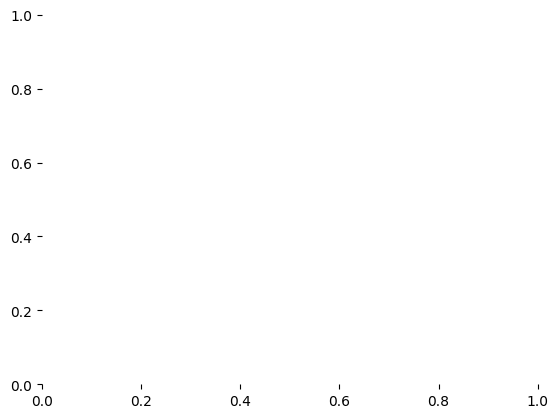

In [266]:
sns.heatmap(df_corr)

# Calculando correlação entre todos experimentos gerados

In [5]:
def mean_corr(dir):
    all_files = [file for file in os.listdir(dir) if file.endswith("_allConfigurations.csv")]
    print(all_files)
    all_files = [os.path.join(dir, file) for file in all_files]
    dfs= []

    for file in all_files:
        print(f"Lendo arquivo: {file}")
        df = pd.read_csv(file)
        df.index = df.index + 1
        #tratando
        df = df.drop(df.columns[0],axis=1)
        df = df.drop(df.columns[10],axis=1)
        #normalizando
        df = df / df.max(axis=0)
        #gerando correlação
        df = df.corr(method='kendall')
        dfs.append(df)
    
    print(len(dfs))
    
    if len(dfs) > 0:
        df_mean = pd.concat(dfs).groupby(level=0).mean()
        #print(df_mean.info)
    
    return df_mean


['irace_K3E1C10J1_allConfigurations.csv', 'irace_K3E1C10J2_allConfigurations.csv', 'irace_K3E1C10J3_allConfigurations.csv', 'irace_K3E1C15J1_allConfigurations.csv', 'irace_K3E1C15J2_allConfigurations.csv', 'irace_K3E1C15J3_allConfigurations.csv', 'irace_K3E1C18J1_allConfigurations.csv', 'irace_K3E1C18J2_allConfigurations.csv', 'irace_K3E1C18J3_allConfigurations.csv', 'irace_K3E2C10J1_allConfigurations.csv', 'irace_K3E2C10J2_allConfigurations.csv', 'irace_K3E2C10J3_allConfigurations.csv', 'irace_K3E2C15J1_allConfigurations.csv', 'irace_K3E2C15J2_allConfigurations.csv', 'irace_K3E2C15J3_allConfigurations.csv', 'irace_K3E2C18J1_allConfigurations.csv', 'irace_K3E2C18J2_allConfigurations.csv', 'irace_K3E2C18J3_allConfigurations.csv', 'irace_K3E3C10J1_allConfigurations.csv', 'irace_K3E3C10J2_allConfigurations.csv', 'irace_K3E3C10J3_allConfigurations.csv', 'irace_K3E3C15J1_allConfigurations.csv', 'irace_K3E3C15J2_allConfigurations.csv', 'irace_K3E3C15J3_allConfigurations.csv', 'irace_K3E3C18J

<Axes: >

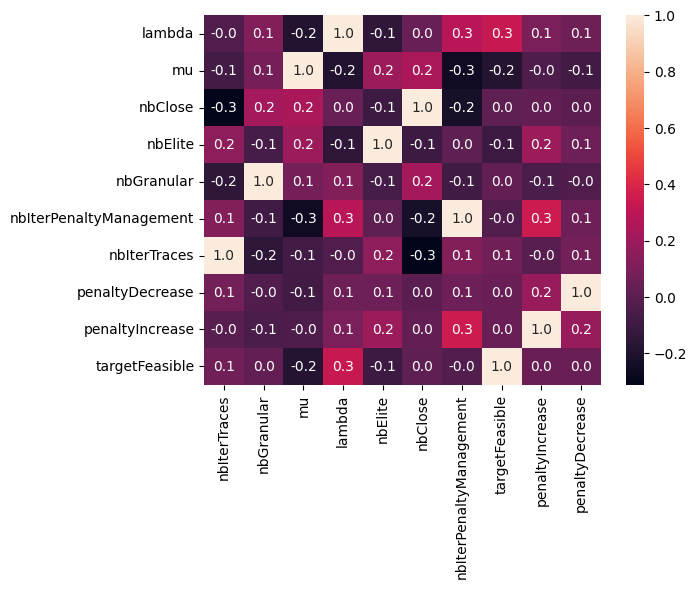

In [7]:
df_corr_geral = mean_corr('../logs_extraidos')
sns.heatmap(df_corr_geral, annot=True, fmt=".1f")

# Calculando relação entre hiper-parametros e valores (utilizando todos os logs)

In [22]:
df = mean_rel('../logs_extraidos')
df

['irace_K3E1C10J1_allConfigurations.csv', 'irace_K3E1C10J2_allConfigurations.csv', 'irace_K3E1C10J3_allConfigurations.csv', 'irace_K3E1C15J1_allConfigurations.csv', 'irace_K3E1C15J2_allConfigurations.csv', 'irace_K3E1C15J3_allConfigurations.csv', 'irace_K3E1C18J1_allConfigurations.csv', 'irace_K3E1C18J2_allConfigurations.csv', 'irace_K3E1C18J3_allConfigurations.csv', 'irace_K3E2C10J1_allConfigurations.csv', 'irace_K3E2C10J2_allConfigurations.csv', 'irace_K3E2C10J3_allConfigurations.csv', 'irace_K3E2C15J1_allConfigurations.csv', 'irace_K3E2C15J2_allConfigurations.csv', 'irace_K3E2C15J3_allConfigurations.csv', 'irace_K3E2C18J1_allConfigurations.csv', 'irace_K3E2C18J2_allConfigurations.csv', 'irace_K3E2C18J3_allConfigurations.csv', 'irace_K3E3C10J1_allConfigurations.csv', 'irace_K3E3C10J2_allConfigurations.csv', 'irace_K3E3C10J3_allConfigurations.csv', 'irace_K3E3C15J1_allConfigurations.csv', 'irace_K3E3C15J2_allConfigurations.csv', 'irace_K3E3C15J3_allConfigurations.csv', 'irace_K3E3C18J

,nbIterTraces,nbGranular,mu,lambda,nbElite,nbClose,nbIterPenaltyManagement,targetFeasible,penaltyIncrease,penaltyDecrease
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-0.118185,0.123957,-0.022171,0.265512,-0.183302,0.090116,0.092943,0.135831,-0.083730,-0.130019
3,0.018187,0.116399,0.004306,0.159814,-0.114755,0.097287,0.088019,0.020785,0.010537,-0.081443
4,-0.000307,0.083123,0.050397,0.231547,-0.203236,0.085253,0.112362,0.073552,-0.032108,-0.019559
5,-0.067939,0.154397,0.045192,0.283074,-0.138346,0.085288,0.055058,0.107324,0.066485,-0.013527
6,-0.054044,0.079318,0.073156,0.259429,-0.105194,0.077843,0.083674,0.079525,0.000359,-0.022217
7,-0.031531,0.039942,0.051900,0.186185,-0.121255,0.093488,-0.000184,0.188889,-0.050737,-0.064946
8,-0.034840,0.053876,0.078124,0.250876,-0.079703,0.032605,-0.008445,0.129035,-0.055311,0.001294
9,-0.081165,0.117470,0.114112,0.233355,-0.154050,0.061035,0.017090,0.075210,-0.079345,-0.058059
10,-0.093680,0.062997,0.083868,0.180405,-0.137095,0.009255,0.157381,0.142467,0.050001,0.102727


<Axes: >

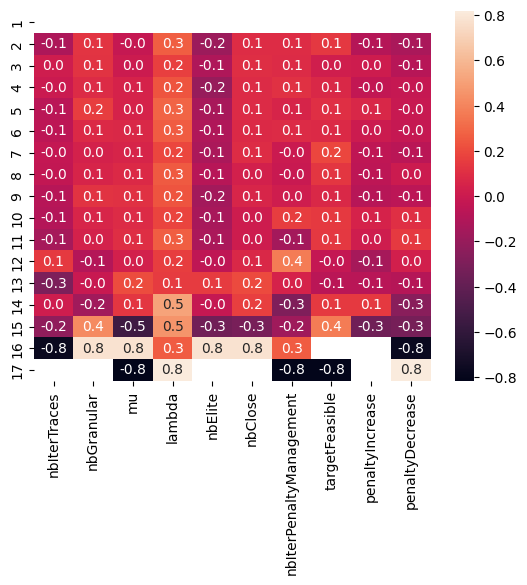

In [23]:
sns.heatmap(df, annot=True, fmt=".1f")

# Clusterização

In [16]:
df_bestConfig = group_bestConfig('../logs_extraidos')
print(df_bestConfig.info)
df_bestConfig = df_bestConfig.drop(['X_variable', '.ID.', '.PARENT.', 'Unnamed: 0'], axis=1)

['irace_K3E1C10J1_bestConfig.csv', 'irace_K3E1C10J2_bestConfig.csv', 'irace_K3E1C10J3_bestConfig.csv', 'irace_K3E1C15J1_bestConfig.csv', 'irace_K3E1C15J2_bestConfig.csv', 'irace_K3E1C15J3_bestConfig.csv', 'irace_K3E1C18J1_bestConfig.csv', 'irace_K3E1C18J2_bestConfig.csv', 'irace_K3E1C18J3_bestConfig.csv', 'irace_K3E2C10J1_bestConfig.csv', 'irace_K3E2C10J2_bestConfig.csv', 'irace_K3E2C10J3_bestConfig.csv', 'irace_K3E2C15J1_bestConfig.csv', 'irace_K3E2C15J2_bestConfig.csv', 'irace_K3E2C15J3_bestConfig.csv', 'irace_K3E2C18J1_bestConfig.csv', 'irace_K3E2C18J2_bestConfig.csv', 'irace_K3E2C18J3_bestConfig.csv', 'irace_K3E3C10J1_bestConfig.csv', 'irace_K3E3C10J2_bestConfig.csv', 'irace_K3E3C10J3_bestConfig.csv', 'irace_K3E3C15J1_bestConfig.csv', 'irace_K3E3C15J2_bestConfig.csv', 'irace_K3E3C15J3_bestConfig.csv', 'irace_K3E3C18J1_bestConfig.csv', 'irace_K3E3C18J2_bestConfig.csv', 'irace_K3E3C18J3_bestConfig.csv', 'irace_K5E1C10J1_bestConfig.csv', 'irace_K5E1C10J2_bestConfig.csv', 'irace_K5E1C1

In [36]:
df_bestConfig

,nbIterTraces,nbGranular,mu,lambda,nbElite,nbClose,nbIterPenaltyManagement,targetFeasible,penaltyIncrease,penaltyDecrease,X_value
0,700,20,30,20,5,2,100,0.4,1.2,0.65,147397
1,700,20,30,20,5,2,100,0.4,1.2,0.65,27546
2,700,20,30,20,5,2,100,0.4,1.2,0.65,42157
3,700,20,30,20,5,2,100,0.4,1.2,0.65,66459
4,700,20,30,20,5,2,100,0.4,1.2,0.65,21245
...,...,...,...,...,...,...,...,...,...,...,...
1691,250,25,25,20,5,6,100,0.3,1.2,0.75,87063
1692,250,25,25,20,5,6,100,0.3,1.2,0.75,147853
1693,250,25,25,20,5,6,100,0.3,1.2,0.75,1015
1694,250,25,25,20,5,6,100,0.3,1.2,0.75,24306


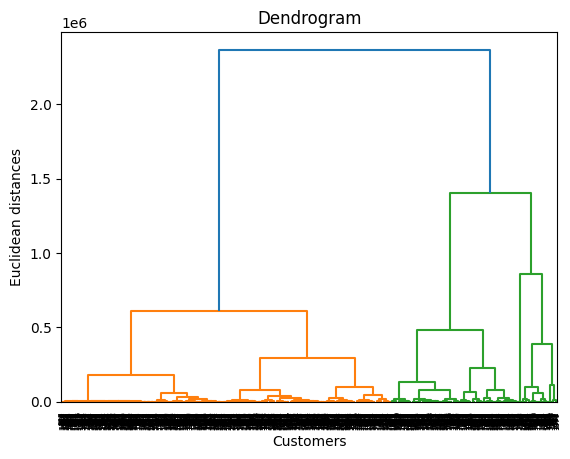

In [21]:
dendrogram = sch.dendrogram(sch.linkage(df_bestConfig, method  = "ward"))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [33]:
hc = AgglomerativeClustering(n_clusters = 5, metric = 'euclidean', linkage ='ward')

In [34]:
y_hc=hc.fit_predict(df_bestConfig)


InvalidIndexError: (array([False, False, False, ..., False, False, False], shape=(1696,)), 0)

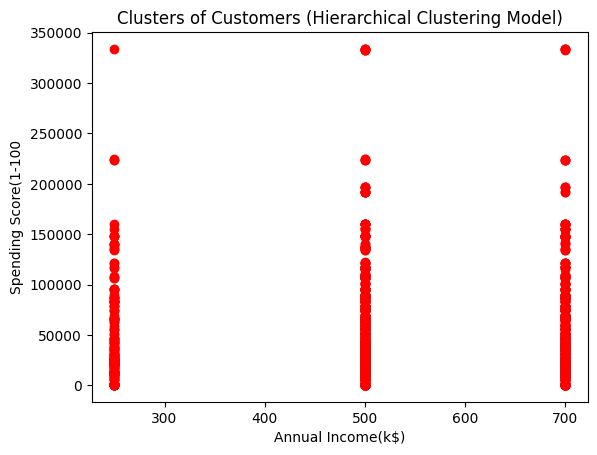

In [39]:
plt.scatter(df_bestConfig['nbIterTraces'], df_bestConfig['X_value'], c='red')
plt.title('Clusters of Customers (Hierarchical Clustering Model)')
plt.xlabel('Annual Income(k$)')
plt.ylabel('Spending Score(1-100')
plt.show()

In [ ]:
df_bestConfig = df_bestConfig / df_bestConfig.max(axis=0)